#  1.自分が取り組む通し課題を1つ選択するkaggleアカウントを取得し、該当課題のデータをダウンロードする。
きのこ。にしました。

In [1]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.model_selection import train_test_split # Data分割
from IPython.display import display


In [2]:
# データ取り込み
dfm = pd.read_csv("mushrooms/mushrooms.csv")
#　きのこの属性表示。目的変数：class edible or poisonous 2値, 説明変数：22種。
print(dfm.columns)
print("shape:"+ str(dfm.shape))
dfm.tail()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
shape:(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


# 2. 目的変数と説明変数の関係を確認するためのグラフを作成する（ここからはノートブック上の作業です）。
目的変数：class e,p
説明変数：それ以外22種類
class e、p毎の各説明変数の個数をカウントしてプロットする。

Item No.0


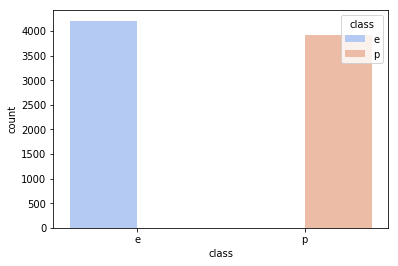

Item No.1


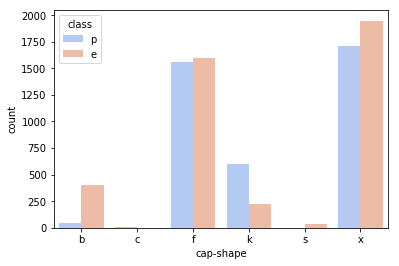

Item No.2


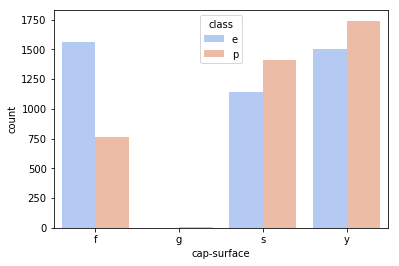

Item No.3


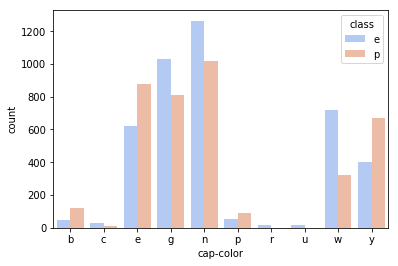

Item No.4


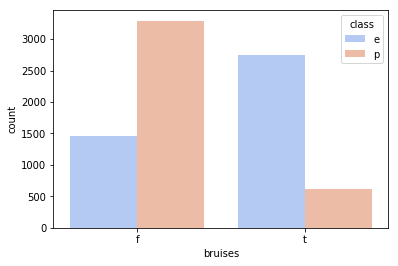

Item No.5


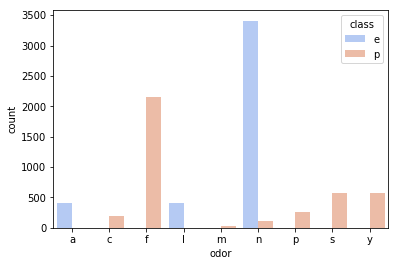

Item No.6


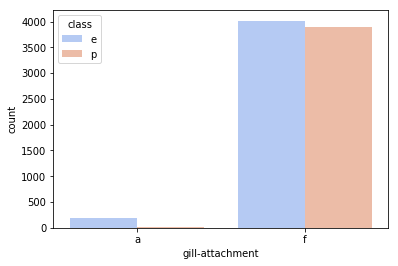

Item No.7


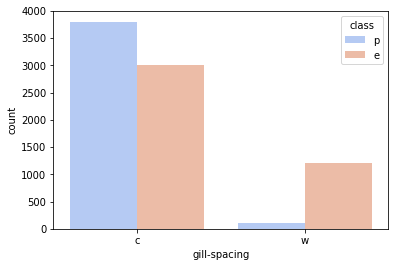

Item No.8


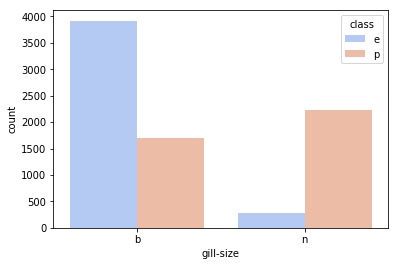

Item No.9


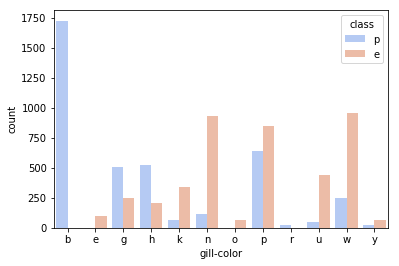

Item No.10


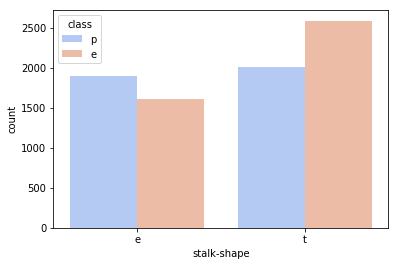

Item No.11


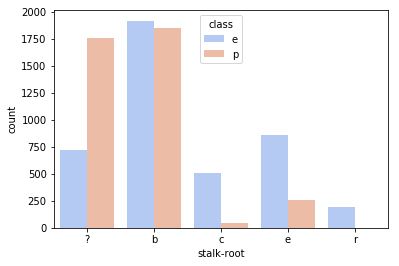

Item No.12


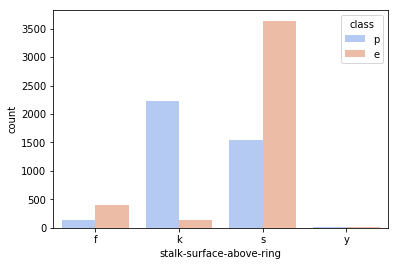

Item No.13


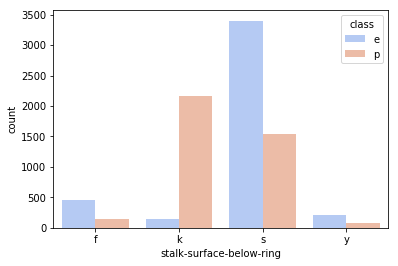

Item No.14


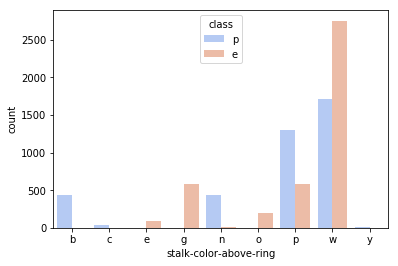

Item No.15


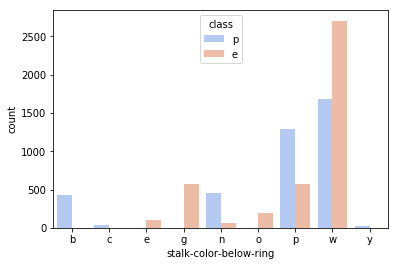

Item No.16


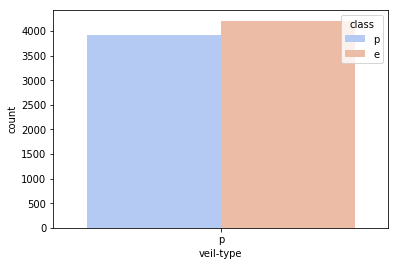

Item No.17


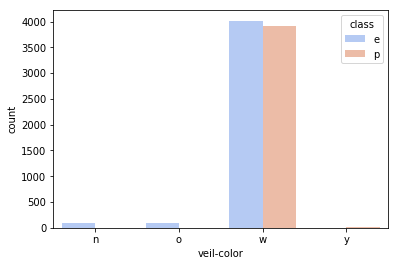

Item No.18


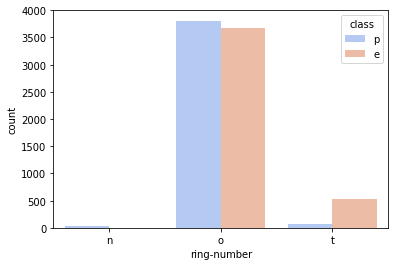

Item No.19


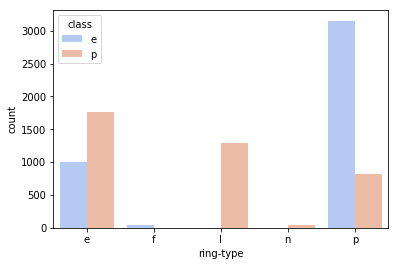

Item No.20


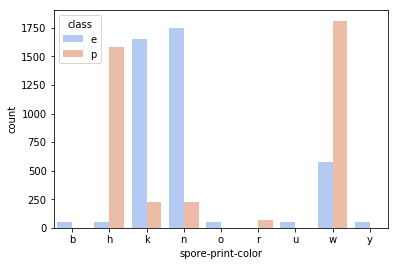

Item No.21


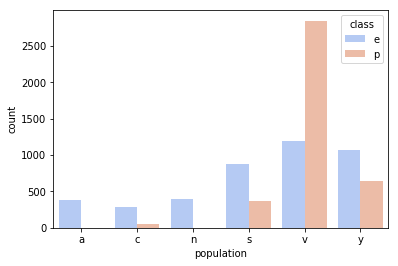

Item No.22


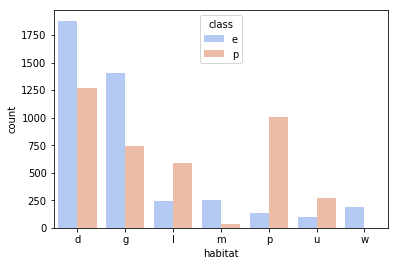

In [3]:
# 目的変数と説明変数の関係性表示
count_i=0;
for item in dfm.columns:
    #sns.countplot("cap-shape", data= dfm.sort_values("cap-shape"),hue="class", palette="coolwarm")
    print("Item No."+str(count_i))
    count_i = count_i + 1
    sns.countplot(item, data= dfm.sort_values(item),hue="class", palette="coolwarm")
    plt.show()


# 3. 目的変数を説明するのに有効そうな説明変数を見つける。
Item No.4のbruisesがわかりやすいので、まずbruisesで評価。

# 4. 欠測値と異常値を確認し、適切に処理する（前処理で習ったことを利用して）。
欠損値はなさそう。異常値は不明。

In [4]:
print(dfm.isna().any())
print(dfm.isnull().any())

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool
class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gi

# 5. DAY1で学んだアルゴリズムを利用する。回帰の場合は線形回帰、分類の場合はロジスティック回帰 質的変数が扱えないアルゴリズムを使う場合は、ダミー変数に置き換える。
e,pの2値分類なので、ロジスティック回帰を使う。カテゴリ変数なのでダミー変数に置き換える。

In [5]:
#  すべてカテゴリ変数なので、ダミー変数にする
dfm_d = pd.get_dummies(dfm)
dfm_d.tail()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8123,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## 評価その１
まずbruisesで評価してみる。

In [6]:
## よくわからないので、一回bruisesだけでロジスティック回帰をまわしてみる。
dfm_d_copy = pd.DataFrame(dfm_d)
for item in dfm_d.columns:
    if item.find("class_") > -1:
        print("not drop : " +item)
    else:
        if item.find("bruises_") > -1 :
            print("not drop : "+item)
        else:
            dfm_d_copy = dfm_d_copy.drop(item, axis=1)
            print("drop : " +item)

dfm_d_copy.tail()
y = dfm_d_copy.class_p.to_frame()
X = dfm_d_copy.drop(["class_p","class_e"], axis=1)

not drop : class_e
not drop : class_p
drop : cap-shape_b
drop : cap-shape_c
drop : cap-shape_f
drop : cap-shape_k
drop : cap-shape_s
drop : cap-shape_x
drop : cap-surface_f
drop : cap-surface_g
drop : cap-surface_s
drop : cap-surface_y
drop : cap-color_b
drop : cap-color_c
drop : cap-color_e
drop : cap-color_g
drop : cap-color_n
drop : cap-color_p
drop : cap-color_r
drop : cap-color_u
drop : cap-color_w
drop : cap-color_y
not drop : bruises_f
not drop : bruises_t
drop : odor_a
drop : odor_c
drop : odor_f
drop : odor_l
drop : odor_m
drop : odor_n
drop : odor_p
drop : odor_s
drop : odor_y
drop : gill-attachment_a
drop : gill-attachment_f
drop : gill-spacing_c
drop : gill-spacing_w
drop : gill-size_b
drop : gill-size_n
drop : gill-color_b
drop : gill-color_e
drop : gill-color_g
drop : gill-color_h
drop : gill-color_k
drop : gill-color_n
drop : gill-color_o
drop : gill-color_p
drop : gill-color_r
drop : gill-color_u
drop : gill-color_w
drop : gill-color_y
drop : stalk-shape_e
drop : stalk-

## 整理した目的変数yと説明変数X

In [7]:
#目的変数
print(y.head())
#説明変数
print(X.head())

   class_p
0        1
1        0
2        0
3        1
4        0
   bruises_f  bruises_t
0          0          1
1          0          1
2          0          1
3          0          1
4          1          0


In [8]:
# ロジスティックモデルの作成
log_model = LogisticRegression()
# フィッティング、作成実行
log_model.fit(X, np.ravel(y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
print("log_model.score      : " +str(log_model.score(X,y)))
print("log_model.intercept_ : " + str(log_model.intercept_))
print("log_model.coef_      : " + str(log_model.coef_))

coef_df = pd.DataFrame([X.columns,log_model.coef_[0]]).T
coef_df

log_model.score      : 0.7439684884293452
log_model.intercept_ : [-0.22220182]
log_model.coef_      : [[ 1.03697715 -1.25917898]]


,0,1
0,bruises_f,1.03698
1,bruises_t,-1.25918


## 評価その２
データを訓練、学習、に分けて評価する

In [10]:
# データを分けて評価
X_test, X_train, y_test, y_train = train_test_split(X,y)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(6093, 2)
(2031, 2)
(6093, 1)
(2031, 1)


In [11]:
# モデル作成、実行
log_model2 = LogisticRegression()
log_model2.fit(X_train,np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
# testDataに対して予測
y_predict = log_model2.predict(X_test) 
print(y_predict, y_predict.shape)

[1 0 1 ... 0 1 1] (6093,)


# 6. 予測精度または識別精度は、交差検証によって確認する。回帰問題の場合は、MSE、RMSE、MAEを求める。分類問題の場合は、混同行列を作成し、Accuracy, Recall, Precisionを求める。
Confusion matrix, Accuracy, Recall, Precisionを求める

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

print("confusion_matrix      :")

conf_ma = pd.DataFrame(confusion_matrix(y_test, y_predict),
                       index=["realClass_0","realClass_1"], columns=["predictedClass_0","predictedClass_1"])

print(conf_ma)
print(" ")
print("accuracy_score        : " +  str(accuracy_score(y_test, y_predict)))
print("precision_score       : " +  str(precision_score(y_test, y_predict)))
print("recall_score          : " +  str(recall_score(y_test, y_predict)))
print("f1_score              : " +  str(f1_score(y_test, y_predict)))
print("")
print("classification_report :")
print(classification_report(y_test, y_predict))

confusion_matrix      :
             predictedClass_0  predictedClass_1
realClass_0              2075              1089
realClass_1               479              2450
 
accuracy_score        : 0.7426555063187265
precision_score       : 0.6922859564848828
recall_score          : 0.8364629566404916
f1_score              : 0.7575757575757576

classification_report :
             precision    recall  f1-score   support

          0       0.81      0.66      0.73      3164
          1       0.69      0.84      0.76      2929

avg / total       0.75      0.74      0.74      6093



## 評価その３  説明変数間の関係性を見て、使用する説明変数を選ぶ

In [14]:
#相関行列
dfm_d_corr=dfm_d.corr();
print(type(dfm_d_corr), dfm_d_corr.shape)
dfm_d_corr.style.background_gradient().format('{:.2f}')

<class 'pandas.core.frame.DataFrame'> (119, 119)


## 目的変数class_p,eと、相関が強い説明変数を選んで、その説明変数間の独立性を確認する

In [15]:
# 目的関数と相関が強い説明変数それぞれ１０個を選んで、その多重きょうせんせいを確認して使う。
print(dfm_d_corr.loc[:,"class_p"].to_frame().sort_values("class_p", ascending=False).head(10))
print(dfm_d_corr.loc[:,"class_e"].to_frame().sort_values("class_e", ascending=False).head(10))

# tail側も使う必要がある？→ eとpがひっくり返っているので同じ。使う必要なさそう。
# print(dfm_d_corr.loc[:,"class_p"].to_frame().sort_values("class_p", ascending=False).tail(10))
# print(dfm_d_corr.loc[:,"class_e"].to_frame().sort_values("class_e", ascending=False).tail(10))

                             class_p
class_p                     1.000000
odor_f                      0.623842
stalk-surface-above-ring_k  0.587658
stalk-surface-below-ring_k  0.573524
gill-size_n                 0.540024
gill-color_b                0.538808
bruises_f                   0.501530
spore-print-color_h         0.490229
ring-type_l                 0.451619
population_v                0.443722
                             class_e
class_e                     1.000000
odor_n                      0.785557
ring-type_p                 0.540469
gill-size_b                 0.540024
bruises_t                   0.501530
stalk-surface-above-ring_s  0.491314
stalk-surface-below-ring_s  0.425444
spore-print-color_n         0.416645
spore-print-color_k         0.396832
gill-spacing_w              0.348387


In [16]:
head_index_p = dfm_d_corr.loc[:,"class_p"].to_frame().sort_values("class_p", ascending=False).head(10).index
head_index_e = dfm_d_corr.loc[:,"class_e"].to_frame().sort_values("class_e", ascending=False).head(10).index
print(head_index_p)
print(head_index_e)

Index(['class_p', 'odor_f', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k', 'gill-size_n', 'gill-color_b',
       'bruises_f', 'spore-print-color_h', 'ring-type_l', 'population_v'],
      dtype='object')
Index(['class_e', 'odor_n', 'ring-type_p', 'gill-size_b', 'bruises_t',
       'stalk-surface-above-ring_s', 'stalk-surface-below-ring_s',
       'spore-print-color_n', 'spore-print-color_k', 'gill-spacing_w'],
      dtype='object')


In [17]:
# corrを計算
dfm_d_corr.loc[head_index_p,head_index_e].style.background_gradient(cmap="gray").format('{:.2f}')

,class_e,odor_n,ring-type_p,gill-size_b,bruises_t,stalk-surface-above-ring_s,stalk-surface-below-ring_s,spore-print-color_n,spore-print-color_k,gill-spacing_w
class_p,-1.00,-0.79,-0.54,-0.54,-0.50,-0.49,-0.43,-0.42,-0.40,-0.35
odor_f,-0.62,-0.53,-0.43,0.06,-0.34,-0.55,-0.50,-0.34,-0.33,-0.26
stalk-surface-above-ring_k,-0.59,-0.47,-0.55,-0.10,-0.54,-0.85,-0.52,-0.36,-0.35,-0.18
stalk-surface-below-ring_k,-0.57,-0.47,-0.54,-0.09,-0.53,-0.55,-0.78,-0.36,-0.34,-0.17
gill-size_n,-0.54,-0.46,-0.31,-1.00,-0.37,-0.01,0.01,-0.18,-0.19,-0.11
gill-color_b,-0.54,-0.46,-0.51,-0.78,-0.44,-0.15,-0.11,-0.29,-0.28,-0.23
bruises_f,-0.50,-0.29,-0.77,-0.37,-1.00,-0.56,-0.51,-0.33,-0.34,0.30
spore-print-color_h,-0.49,-0.41,-0.31,0.30,-0.24,-0.54,-0.53,-0.28,-0.27,-0.22
ring-type_l,-0.45,-0.38,-0.43,0.29,-0.37,-0.58,-0.54,-0.25,-0.24,-0.19
population_v,-0.44,-0.28,-0.20,-0.51,-0.18,-0.09,-0.04,-0.19,-0.21,-0.31


## 多重共線性の強い説明変数を落としていく。目視。

In [18]:
# 相関の強いところを、黒いところを落としていく。目視できめる。
head_index_p_dropped=head_index_p.drop(["stalk-surface-below-ring_k","bruises_f","stalk-surface-above-ring_k","odor_f","gill-color_b","ring-type_l"])
head_index_e_dropped=head_index_e.drop(["gill-spacing_w","gill-size_b","stalk-surface-above-ring_s","stalk-surface-below-ring_s"])

In [19]:
dfm_d_corr.loc[head_index_p_dropped, head_index_e_dropped].style.background_gradient(cmap="gray").format('{:.2f}')

,class_e,odor_n,ring-type_p,bruises_t,spore-print-color_n,spore-print-color_k
class_p,-1.00,-0.79,-0.54,-0.50,-0.42,-0.40
gill-size_n,-0.54,-0.46,-0.31,-0.37,-0.18,-0.19
spore-print-color_h,-0.49,-0.41,-0.31,-0.24,-0.28,-0.27
population_v,-0.44,-0.28,-0.20,-0.18,-0.19,-0.21


## 学習用のデータを作る。

In [20]:
dfm_d_copy2 = pd.DataFrame(dfm_d)
selected_col = head_index_p_dropped.append(head_index_e_dropped)
dfm_d_copy2 = dfm_d_copy2[selected_col]

dfm_d_copy2.tail()

,class_p,gill-size_n,spore-print-color_h,population_v,class_e,odor_n,ring-type_p,bruises_t,spore-print-color_n,spore-print-color_k
8119,0,0,0,0,1,1,1,0,0,0
8120,0,0,0,1,1,1,1,0,0,0
8121,0,0,0,0,1,1,1,0,0,0
8122,1,1,0,1,0,0,0,0,0,0
8123,0,0,0,0,1,1,1,0,0,0


## 最終的に使う説明変数

In [21]:
X3 = dfm_d_copy2.drop(["class_p","class_e"],axis=1)
X3.tail()

,gill-size_n,spore-print-color_h,population_v,odor_n,ring-type_p,bruises_t,spore-print-color_n,spore-print-color_k
8119,0,0,0,1,1,0,0,0
8120,0,0,1,1,1,0,0,0
8121,0,0,0,1,1,0,0,0
8122,1,0,1,0,0,0,0,0
8123,0,0,0,1,1,0,0,0


## 使う目的変数

In [22]:
y3 = dfm_d_copy2["class_p"].to_frame()
y3.tail()

,class_p
8119,0
8120,0
8121,0
8122,1
8123,0


## データを学習用・テスト用に分割して、ロジスティックモデルで学習、テストデータで予測。

In [23]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, test_size=0.3)

print("X_train3 :" +  str(X_train3.shape))
print("y_train3 :" +  str(y_train3.shape))
print("X_test3  :"  +  str(X_test3.shape))
print("y_test3  :"  +  str(y_test3.shape))

log_model3 = LogisticRegression()
log_model3.fit(X_train3, np.ravel(y_train3))
y_predict3 = log_model3.predict(X_test3)

print("y_predict3 :", y_predict3, len(y_predict3))

X_train3 :(5686, 8)
y_train3 :(5686, 1)
X_test3  :(2438, 8)
y_test3  :(2438, 1)
y_predict3 : [0 1 1 ... 1 0 1] 2438


## 評価用の値を計算

In [24]:
print("confusion_matrix      :")

conf_ma3 = pd.DataFrame(confusion_matrix(y_test3, y_predict3),
                       index=["realClass_0","realClass_1"], columns=["predictedClass_0","predictedClass_1"])

print(conf_ma3)
print(" ")
print("accuracy_score        : " + str(accuracy_score(y_test3, y_predict3)))
print("precision_score       : " +  str(precision_score(y_test3, y_predict3)))
print("recall_score          : " +  str(recall_score(y_test3, y_predict3)))
print("f1_score              : " +  str(f1_score(y_test3, y_predict3)))
print("")
print("classification_report :")
print(classification_report(y_test3, y_predict3))

confusion_matrix      :
             predictedClass_0  predictedClass_1
realClass_0              1214                55
realClass_1                26              1143
 
accuracy_score        : 0.9667760459392944
precision_score       : 0.9540901502504173
recall_score          : 0.9777587681779298
f1_score              : 0.9657794676806084

classification_report :
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1269
          1       0.95      0.98      0.97      1169

avg / total       0.97      0.97      0.97      2438



In [25]:
print("log_model.intercept_ : " + str(log_model3.intercept_))
print("log_model.coef_      : " + str(log_model3.coef_))


log_model.intercept_ : [1.76248585]
log_model.coef_      : [[ 2.36956977  1.66855625  0.87717145 -4.90640264  0.28563597 -0.95615107
  -3.37986728 -2.90983087]]


In [26]:
coef_df3 = pd.DataFrame([X3.columns,log_model3.coef_[0]]).T
coef_df3

,0,1
0,gill-size_n,2.36957
1,spore-print-color_h,1.66856
2,population_v,0.877171
3,odor_n,-4.9064
4,ring-type_p,0.285636
5,bruises_t,-0.956151
6,spore-print-color_n,-3.37987
7,spore-print-color_k,-2.90983


# 以上

#### Attribute Information: (classes: edible=e, poisonous=p)
    cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
    cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
    cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
    bruises: bruises=t,no=f
    odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
    gill-attachment: attached=a,descending=d,free=f,notched=n
    gill-spacing: close=c,crowded=w,distant=d
    gill-size: broad=b,narrow=n
    gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
    stalk-shape: enlarging=e,tapering=t
    stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
    stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
    stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
    veil-type: partial=p,universal=u
    veil-color: brown=n,orange=o,white=w,yellow=y
    ring-number: none=n,one=o,two=t
    ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
    spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
    population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
    habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
